In [1]:
import numpy as np
from math import sin,cos,pi
from funcoesTermosol import *

In [2]:
numNo,matrixNo,numMemb,matrixInc,numCar,vetorFor,numRes,vetorRes = importa("entrada-desafio.xlsx")
print(vetorRes,"\n")
listaRestricao = [int(i) for i in vetorRes]
listaRestricao
# print(matrixInc)

[[ 1.]
 [13.]] 



[1, 13]

<img src="desafioponte.png">

In [3]:
plota(matrixNo,matrixInc)

<Figure size 640x480 with 1 Axes>

In [4]:
class no:
    def __init__(self, num, ponto):
        self.x = ponto[0]
        self.y = ponto[1]
        self.num = num
        self.graux = num*2 - 1
        self.grauy = num*2

In [5]:
class barra:
    def __init__(self,E,A, no1, no2):
        self.no1 = no1
        self.no2 = no2
        self.E = E
        self.A = A
        self.L = ((no2.x - no1.x)**2+(no2.y - no1.y)**2)**0.5
        s = (no2.y - no1.y)/self.L
        c = (no2.x - no1.x)/self.L
        self.s=s
        self.c=c
        self.matrix = (self.E*self.A/self.L)*np.array([[c**2,c*s,-c**2,-c*s],
                                                       [c*s,s**2,-c*s,-s**2],
                                                       [-c**2,-c*s,c**2,c*s],
                                                       [-c*s,-s**2,c*s,s**2]])
        
        self.listagraus = [no1.graux, no1.grauy, no2.graux, no2.grauy]
        self.forcainterna = None
        self.tensao = None
        self.defesp = None
        
    def calculaTudo(self, desno1x, desno1y,desno2x,desno2y):
        s = (self.no2.y - self.no1.y)/self.L
        c = (self.no2.x - self.no1.x)/self.L
        self.defesp = (-c*desno1x-s*desno1y+c*desno2x+s*desno2y)/self.L
        self.tensao = self.E*self.defesp
        self.forcainterna = self.tensao*self.A
        return self.defesp,self.tensao, self.forcainterna
            


In [6]:
def simplificaGeral(matrix, vetorRes):
    newMatrix = np.delete(matrix, (vetorRes), axis=0)
    newMatrix = np.delete(newMatrix, (vetorRes), axis=1)
    return newMatrix

def simplificaSimples(matrix, vetorRes):
    newMatrix = np.delete(matrix, (vetorRes), axis=0)
    return newMatrix


In [7]:
def calcula_peso(l_barras,densidade):
    massa=0
    for b in l_barras:
        massa += (b.L/1000) * b.A * densidade
    return massa

In [8]:
def matrixKg(listaBarra, numNos):
    n = len(listaBarra)
    zero = np.zeros((numNos*2,numNos*2))
    for bar in listaBarra:
        zero[bar.listagraus[0]-1:bar.listagraus[1],bar.listagraus[0]-1:bar.listagraus[1]] += bar.matrix[0:2,0:2]
        
        zero[bar.listagraus[0]-1:bar.listagraus[1],bar.listagraus[2]-1:bar.listagraus[3]] += bar.matrix[0:2,2:4]
        
        zero[bar.listagraus[2]-1:bar.listagraus[3],bar.listagraus[0]-1:bar.listagraus[1]] += bar.matrix[2:4,0:2]
        
        zero[bar.listagraus[2]-1:bar.listagraus[3],bar.listagraus[2]-1:bar.listagraus[3]] += bar.matrix[2:4,2:4]

    return zero


In [9]:
def jacobi(matrixRigidez, matrixForca, tolerancia):
    size = len(matrixRigidez)
    matrixDeslocamento = np.array([[0.0]]*size)
    loop = True
    while loop:
        comp = matrixDeslocamento.copy()
        for n in range(size):
            R = matrixForca[n][0]
            for i in range(size):
                R -= matrixRigidez[n][i]*matrixDeslocamento[i][0]
            R += matrixRigidez[n][n]*matrixDeslocamento[n][0]
            R = R/matrixRigidez[n][n]    
            matrixDeslocamento[n][0] = R
        if(max(abs(comp - matrixDeslocamento))[0] < tolerancia):
            loop = False
    return matrixDeslocamento
            
        
        


In [10]:
listaNo = []
for i in range(numNo):
    n = no(i+1, [matrixNo[0][i],matrixNo[1][i]])
    listaNo.append(n)


In [11]:
listaBarra = []
for i in range(len(matrixInc)):
    b = barra(matrixInc[i][2],matrixInc[i][3],listaNo[int(matrixInc[i][0]) - 1],listaNo[int(matrixInc[i][1]) - 1])
    listaBarra.append(b)
#     print(b.listagraus)

In [12]:
Kg = matrixKg(listaBarra, numNo)

In [13]:
simpleKg = simplificaGeral(Kg,vetorRes)
simpleVetorFor = simplificaSimples(vetorFor,vetorRes)

C:\Users\55419\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  
C:\Users\55419\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\55419\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  import sys


In [14]:
deslocamento = np.linalg.solve(simpleKg,simpleVetorFor)
# deslocamento

In [15]:
# jacobi(simpleKg,simpleVetorFor, 1e-12)

In [16]:
listadeslocamento = [[float(i)] for i in deslocamento]
listaRes = [int(i) for i in vetorRes]
for n in range(len(listaNo)*2):
    if(n in listaRes):
        listadeslocamento.insert(n,[0])
listadeslocamento = np.array(listadeslocamento)

In [17]:
newMatrixNo = matrixNo.copy()
for idx,valor in enumerate(listadeslocamento):
    if(idx%2==0):
        newMatrixNo[0][int(idx/2)] += valor[0]
    else:
        newMatrixNo[1][int(idx/2)] += valor[0]
print(matrixNo)
print(newMatrixNo)

[[  0.          83.33333333 166.66666667 250.         333.33333333
  416.66666667 500.           0.          83.33333333 166.66666667
  250.         333.33333333 416.66666667 500.          41.66666667
   83.33333333 125.         166.66666667 210.         250.
  290.         333.33333333 375.         416.66666667 458.33333333]
 [  0.           0.           0.           0.           0.
    0.           0.          83.33333333  83.33333333  83.33333333
   83.33333333  83.33333333  83.33333333  83.33333333 120.56333333
  133.23333333 141.19333333 146.27333333 149.20333333 149.20333333
  149.20333333 146.27333333 141.19333333 133.23333333 120.56333333]]
[[-3.60381098e-01  8.29729522e+01  1.66430890e+02  2.50025097e+02
   3.33619304e+02  4.17077242e+02  5.00410575e+02  1.44166594e-01
   8.35089693e+01  1.66773686e+02  2.50025097e+02  3.33276508e+02
   4.16541225e+02  4.99906028e+02  4.21388424e+01  8.38273646e+01
   1.25448404e+02  1.66996084e+02  2.10165660e+02  2.50025097e+02
   2.89884534

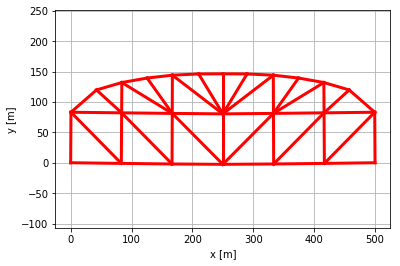

In [18]:
plota(newMatrixNo,matrixInc)

In [19]:
listaDef = []
listaTensao = []
listaForcaInterna = []

for b in listaBarra:
    dx1 = listadeslocamento[b.no1.graux-1]
    dy1 = listadeslocamento[b.no1.grauy-1]
    dx2 = listadeslocamento[b.no2.graux-1]
    dy2 = listadeslocamento[b.no2.grauy-1]
    
    defor,tens,fi = b.calculaTudo(dx1,dy1,dx2,dy2)
    listaDef.append(defor)
    listaTensao.append(tens)
    listaForcaInterna.append(fi)
listaDef = np.array(listaDef)
listaTensao = np.array(listaTensao)
listaForcaInterna = np.array(listaForcaInterna)

In [20]:
listaR=Kg.dot(listadeslocamento)
listaReacao=[]
for i in vetorRes:
    listaReacao.append([listaR[int(i[0])][0]])
listaReacao=np.array(listaReacao)

In [21]:
calcula_peso(listaBarra,848)

0.29659423018624

In [22]:
geraSaida("saidadesafio",listaReacao,listadeslocamento,listaDef,listaForcaInterna,listaTensao)

In [23]:
def maior_parametro_barra(lista):
    new_l=[];
    for i in range(len(lista)):
        new_l.append({"barra":i,"valor":abs(lista[i])})
        
    final_l = sorted(new_l, key=lambda k: k['valor']) 
    return final_l

In [24]:
maior_parametro_barra(listaDef)

[{'barra': 0, 'valor': array([0.])},
 {'barra': 5, 'valor': array([6.66133815e-19])},
 {'barra': 33, 'valor': array([6.7419039e-18])},
 {'barra': 24, 'valor': array([0.00037763])},
 {'barra': 19, 'valor': array([0.00037763])},
 {'barra': 29, 'valor': array([0.00056895])},
 {'barra': 37, 'valor': array([0.00056895])},
 {'barra': 39, 'valor': array([0.00080084])},
 {'barra': 27, 'valor': array([0.00080084])},
 {'barra': 23, 'valor': array([0.0008234])},
 {'barra': 20, 'valor': array([0.0008234])},
 {'barra': 30, 'valor': array([0.00088494])},
 {'barra': 36, 'valor': array([0.00088494])},
 {'barra': 22, 'valor': array([0.00098307])},
 {'barra': 21, 'valor': array([0.00098307])},
 {'barra': 26, 'valor': array([0.00111155])},
 {'barra': 40, 'valor': array([0.00111155])},
 {'barra': 38, 'valor': array([0.00130555])},
 {'barra': 28, 'valor': array([0.00130555])},
 {'barra': 1, 'valor': array([0.00149525])},
 {'barra': 7, 'valor': array([0.00149525])},
 {'barra': 11, 'valor': array([0.00149525

In [25]:
maior_parametro_barra(listaForcaInterna)

[{'barra': 0, 'valor': array([0.])},
 {'barra': 5, 'valor': array([2.66453526e-14])},
 {'barra': 33, 'valor': array([2.69676156e-13])},
 {'barra': 24, 'valor': array([75.52640502])},
 {'barra': 19, 'valor': array([75.52640502])},
 {'barra': 29, 'valor': array([113.79004753])},
 {'barra': 37, 'valor': array([113.79004753])},
 {'barra': 39, 'valor': array([240.25235424])},
 {'barra': 27, 'valor': array([240.25235424])},
 {'barra': 23, 'valor': array([247.01863638])},
 {'barra': 20, 'valor': array([247.01863638])},
 {'barra': 30, 'valor': array([353.97462943])},
 {'barra': 36, 'valor': array([353.97462943])},
 {'barra': 22, 'valor': array([393.22836539])},
 {'barra': 21, 'valor': array([393.22836539])},
 {'barra': 26, 'valor': array([444.61884184])},
 {'barra': 40, 'valor': array([444.61884184])},
 {'barra': 38, 'valor': array([522.21986058])},
 {'barra': 28, 'valor': array([522.21986058])},
 {'barra': 1, 'valor': array([598.10070482])},
 {'barra': 7, 'valor': array([598.10070482])},
 {'b

In [26]:
maior_parametro_barra(listaTensao)

[{'barra': 0, 'valor': array([0.])},
 {'barra': 5, 'valor': array([2.66453526e-09])},
 {'barra': 33, 'valor': array([2.69676156e-08])},
 {'barra': 24, 'valor': array([1510528.10042805])},
 {'barra': 19, 'valor': array([1510528.10042809])},
 {'barra': 29, 'valor': array([2275800.95068961])},
 {'barra': 37, 'valor': array([2275800.95068962])},
 {'barra': 39, 'valor': array([3203364.72318092])},
 {'barra': 27, 'valor': array([3203364.72318095])},
 {'barra': 23, 'valor': array([3293581.81839911])},
 {'barra': 20, 'valor': array([3293581.81839912])},
 {'barra': 30, 'valor': array([3539746.29427976])},
 {'barra': 36, 'valor': array([3539746.29427979])},
 {'barra': 22, 'valor': array([3932283.65393482])},
 {'barra': 21, 'valor': array([3932283.65393485])},
 {'barra': 26, 'valor': array([4446188.41840782])},
 {'barra': 40, 'valor': array([4446188.41840784])},
 {'barra': 38, 'valor': array([5222198.60582903])},
 {'barra': 28, 'valor': array([5222198.60582906])},
 {'barra': 1, 'valor': array([59